In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn import metrics

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
# importing data

df = pd.read_csv('/content/drive/MyDrive/DS Course Uploads/Datasets/Dry_Bean_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
# Label encode Class

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [7]:
# Preprocessing

print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtypes: float64(1

In [8]:
df.drop_duplicates(df[df.duplicated()], inplace=True)

In [9]:
df.shape

(13543, 17)

In [10]:
# Separating input and output

X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
# Performing train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [12]:
# Creating the model

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Predict the test data

y_pred = model.predict(X_test)

In [14]:
y_pred.shape

(2709,)

In [15]:
# Compare predicted and test data outputs

y_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
y_pred_df

,Actual,Predicted
6581,4,6
13365,3,6
7261,4,4
7620,6,6
11297,3,3
...,...,...
4456,2,2
1564,5,5
7327,4,4
4281,2,2


In [16]:
y_pred_df['Matches?'] = y_pred_df['Actual'] == y_pred_df['Predicted']
y_pred_df

,Actual,Predicted,Matches?
6581,4,6,False
13365,3,6,False
7261,4,4,True
7620,6,6,True
11297,3,3,True
...,...,...,...
4456,2,2,True
1564,5,5,True
7327,4,4,True
4281,2,2,True


In [17]:
y_pred_df[y_pred_df['Matches?'] == True].shape

(1960, 3)

In [18]:
# Getting the percentage of correct values

y_pred_df['Matches?'].value_counts(normalize=True).round(2)

,proportion
Matches?,
True,0.72
False,0.28


In [19]:
# Getting the confusion matrix

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
0,136,0,74,0,33,1,4
1,0,108,0,0,0,0,0
2,59,1,262,0,12,1,4
3,0,0,0,646,4,37,58
4,4,0,2,15,177,5,146
5,3,0,0,88,1,273,63
6,0,0,0,35,35,64,358


<Axes: xlabel='Predicted', ylabel='Actual'>

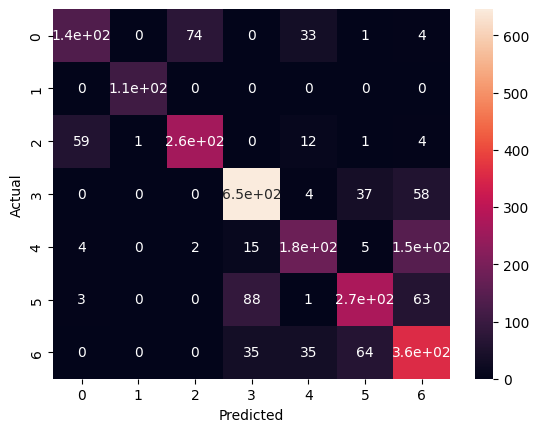

In [20]:
# Create a heatmap

sns.heatmap(cm, annot=True)

In [21]:
# Getting the scores

print("Accuracy - ", metrics.accuracy_score(y_test, y_pred).round(2))
print("Precision - ", metrics.precision_score(y_test, y_pred, average='weighted').round(2))
print("Recall - ", metrics.recall_score(y_test, y_pred, average='weighted').round(2))
print("F1 Score - ", metrics.f1_score(y_test, y_pred, average='weighted').round(2))

Accuracy -  0.72
Precision -  0.73
Recall -  0.72
F1 Score -  0.72


In [22]:
# Getting classification report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       248
           1       0.99      1.00      1.00       108
           2       0.78      0.77      0.77       339
           3       0.82      0.87      0.84       745
           4       0.68      0.51      0.58       349
           5       0.72      0.64      0.67       428
           6       0.57      0.73      0.64       492

    accuracy                           0.72      2709
   macro avg       0.75      0.72      0.73      2709
weighted avg       0.73      0.72      0.72      2709



In [23]:
# Getting the prediction of model on training data

y_pred_train = model.predict(X_train)

# Evaluating the training data

print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train).round(2))
print("Precision:", metrics.precision_score(y_train, y_pred_train, average='weighted').round(2))
print("Recall:", metrics.recall_score(y_train, y_pred_train, average='weighted').round(2))
print("F1 Score:", metrics.f1_score(y_train, y_pred_train, average='weighted').round(2))

Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.71
